In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as soup
import requests
import matplotlib.pyplot as plt
from urllib.request import urlopen as uReq

# Taking the URL link 

In [2]:
url = 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber='

# Looping all the URL

In [3]:
url_list =[]
for i in range(1,51):
    url_list.append(url+str(i))

In [4]:
url_list[:5]

['https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1',
 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=2',
 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=3',
 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=4',
 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=5']

# Creating Page_soup  for all the URLs

In [5]:
page_soup_list = []
for i in range(len(url_list)):
    ur = url_list[i]
    uClinet = uReq(ur)
    page_html = uClinet.read()
    uClinet.close()
    page_soup =soup(page_html,'html.parser')
    page_soup_list.append(page_soup)

In [6]:
page_soup_list[0]

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/><!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/><link href="//images-eu.ssl-images-amazon.com" rel="dns-prefetch"/><link href="//m.media-amazon.com" rel="dns-prefetch"/><link href="//completion.amazon.com" rel="dns-prefetch"/><!-- sp:feature:aui-assets -->
<link href="https://images-eu.ssl-images-amazon.com/images/I/41gCbfiTdaL._RC|516fcOUE-HL.css,01evdoiemkL.css,01K+Ps1DeEL.css,31pdJv9iSzL.css,01tgK36lpGL.css,11UGC+GXOPL.css,21LK7jaicML.css,11L58Qpo0GL.css,21kyTi1FabL.css,01Xl9KigtzL.css,01YhS3Cs-hL.css,21GwE3cR-yL.css,019SHZnt8RL.css,01wAWQRgXzL.css,21bWcRJYNIL.css,11WgRxUdJRL.css,01dU8+SPlFL.css,11ocrgKoE-L.css,01SHjPML6tL.css,111-D2qRjiL.css,01QrWuRrZ-L.css,310Imb6LqFL.css,11Z1a0FxSIL.css,01cbS3UK11L.css,21mOLw+nYYL.css,01L8Y-JFEhL.css_.css?AU

# Extracting Ratings alone from the page_content

In [7]:
rating = []
for i in range(len(page_soup_list)):
    i = page_soup_list[i]
    rat = i.find_all('span',{'class':'a-icon-alt'})
    for i in range(3,len(rat)-5): # the range is specified since it takes the unwanted ratings from the page
        rating.append(rat[i].text.split(' ')[0])    

In [8]:
len(rating)

500

# Extracting Reviews and Title from Each user

In [9]:
r2=['','Report abuse','\nThere was a problem loading comments right now. Please try again later.','\n',
    'Select the department you want to search in','© 1996-2019, Amazon.com, Inc. or its affiliates']
n =[]
for i in range(len(page_soup_list)):
    i = page_soup_list[i]
    rev = i.find_all('span',{'class':''})
    r =[]
    for j in rev:
        r.append(j.text)
    for k in r:
        if k not in r2:
            n.append(k)

In [10]:
review=[]
title=[]
for i in range(0,len(n)):
    if i%2==1:
        review.append(n[i])
    if i%2==0:
        title.append(n[i])

Creating Dataframe and appending all the extracted columns

In [11]:
final = pd.DataFrame([title,review,rating],index=['Title','Review','Rating'])
final = final.T

In [12]:
final.head()

,Title,Review,Rating
0,Price downfall,Sudden downfall of price within two weeks of m...,1.0
1,Battery is not so good,Battery issue,4.0
2,Good,Good,5.0
3,Best Ever,Love this phone a lot...A huge fan of Oneplus....,5.0
4,Good one,Best smartphone under 31500,5.0


In [13]:
final.to_csv('Oneplus6T-Review.csv',header=True)

# Word Cloud For Oneplus 6T Reviews

In [14]:
x = final['Review']

In [15]:
import re

In [16]:
x[0:5]

0    Sudden downfall of price within two weeks of m...
1                                        Battery issue
2                                                 Good
3    Love this phone a lot...A huge fan of Oneplus....
4                          Best smartphone under 31500
Name: Review, dtype: object

In [17]:
x  = ' '.join(x)

In [18]:
x = re.sub('[0-9]','',x)

In [19]:
from nltk.tokenize import RegexpTokenizer

In [20]:
tokenizer = RegexpTokenizer(r'\w+')

In [21]:
x = tokenizer.tokenize(x)

In [22]:
from nltk.corpus import stopwords

In [23]:
x = [i.lower() for i in x]

In [24]:
en_stops = stopwords.words('english')
# appending the stpwords with some frequently unwanted words 
en_stops.append('got')
en_stops.append('day')
en_stops.append('even')
en_stops.append('go')
en_stops.append('time')
en_stops.append('product')
en_stops.append('phone')
a = [ i for i in x if i not in en_stops]

In [25]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [26]:
c=[]
for i in a:
    c.append(lemm.lemmatize(i))   

In [27]:
cnt = pd.Series(c)

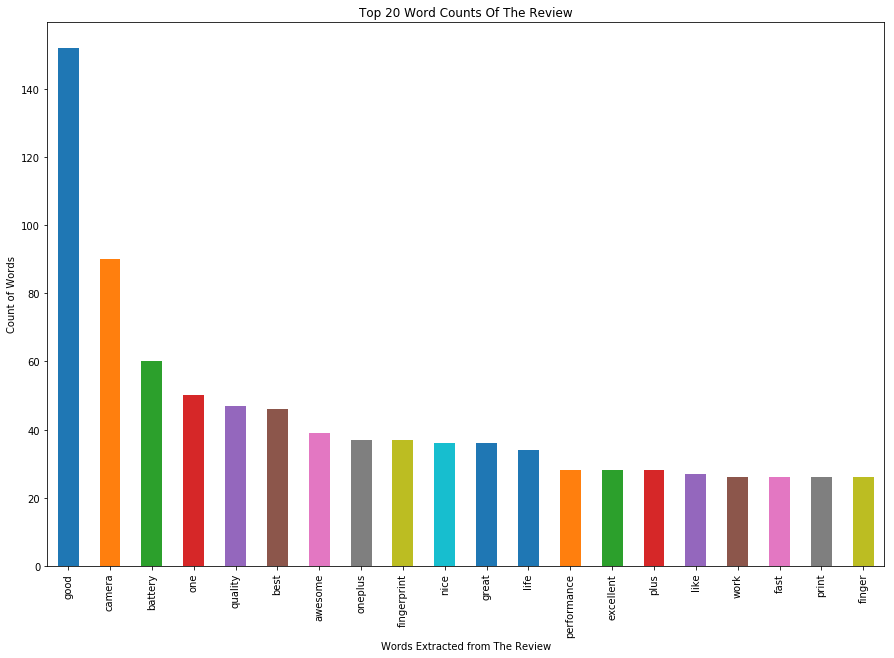

In [28]:
plt.figure(figsize=(15,10))
cnt.value_counts().head(20).plot.bar()
plt.xlabel("Words Extracted from The Review")
plt.ylabel("Count of Words")
plt.title('Top 20 Word Counts Of The Review')
plt.show()

In [29]:
c = ' '.join(c)

In [30]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

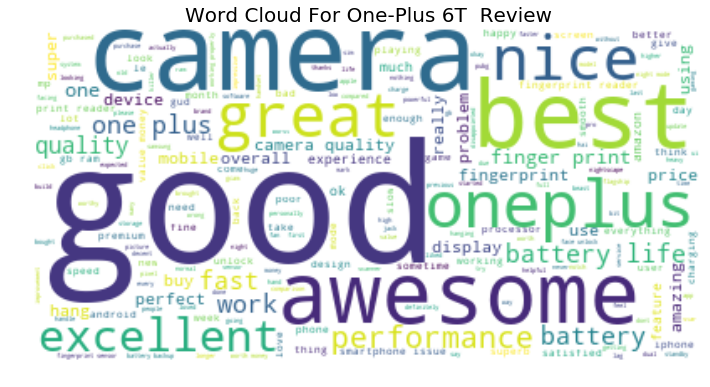

In [31]:
wordcloud = WordCloud(background_color='white').generate(c)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud For One-Plus 6T  Review',{'fontsize':20},loc ='center')
plt.show()

In [32]:
wordcloud.to_file("C:/Users/manoj/OneDrive/Desktop/M.M/Text Mining/Day 4/Oneplus6T_review.png")

# Modeling to extract sentimental Analysis

In [33]:
from textblob import TextBlob

In [34]:
x = final['Review']
s=[]

In [35]:
for i in range(len(x)):
    analysis = TextBlob(x[i])
    #print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        s.append( 'Positive')
    else:
        s.append('Negative')

In [36]:
s = pd.Series(s)

In [37]:
Sentiment = pd.DataFrame([x,s],index=['Review','Sentiment'])

In [38]:
Sentiment = Sentiment.T

In [39]:
Sentiment.head(25)

,Review,Sentiment
0,Sudden downfall of price within two weeks of m...,Negative
1,Battery issue,Negative
2,Good,Positive
3,Love this phone a lot...A huge fan of Oneplus....,Positive
4,Best smartphone under 31500,Positive
5,Excellent,Positive
6,Good,Positive
7,Gud phone,Negative
8,Awesome,Positive
9,Just the beast to be tamed😍😍😍😍😍,Negative


In [40]:
count =Sentiment.groupby('Sentiment').count()
count

,Review
Sentiment,
Negative,140
Positive,360


In [41]:
Negative_count = count.Review[0]
Positive_count = count.Review[1]

In [42]:
print('Positive Review percentage for ONE-PLUS 6T is :',((Positive_count/(Positive_count + Negative_count))*100),'%')
print('Negative Review percentage for ONE-PLUS 6T is :',((Negative_count/(Positive_count + Negative_count))*100),'%')

Positive Review percentage for ONE-PLUS 6T is : 72.0 %
Negative Review percentage for ONE-PLUS 6T is : 28.000000000000004 %


## 70 % of the reviews are positive lets analyse the negative reviews and their insights

In [43]:
negative = Sentiment[Sentiment['Sentiment'] == 'Negative']

# Word Cloud For Negative Reviews

In [44]:
x = negative['Review']

In [45]:
x[0:5]

0     Sudden downfall of price within two weeks of m...
1                                         Battery issue
7                                             Gud phone
9                       Just the beast to be tamed😍😍😍😍😍
10                                            Go get it
Name: Review, dtype: object

In [46]:
x  = ' '.join(x)

In [47]:
x = re.sub('[0-9]','',x)

In [48]:
x = tokenizer.tokenize(x)

In [49]:
x = [i.lower() for i in x]

In [50]:
en_stops = stopwords.words('english')
# appending the stpwords with some frequently unwanted words 
en_stops.append('one')
en_stops.append('like')
en_stops.append('phone')
en_stops.append('plus')
en_stops.append('come')
en_stops.append('got')
en_stops.append('product')
a = [ i for i in x if i not in en_stops]

In [51]:
c=[]
for i in a:
    c.append(lemm.lemmatize(i))   

In [52]:
cnt = pd.Series(c)

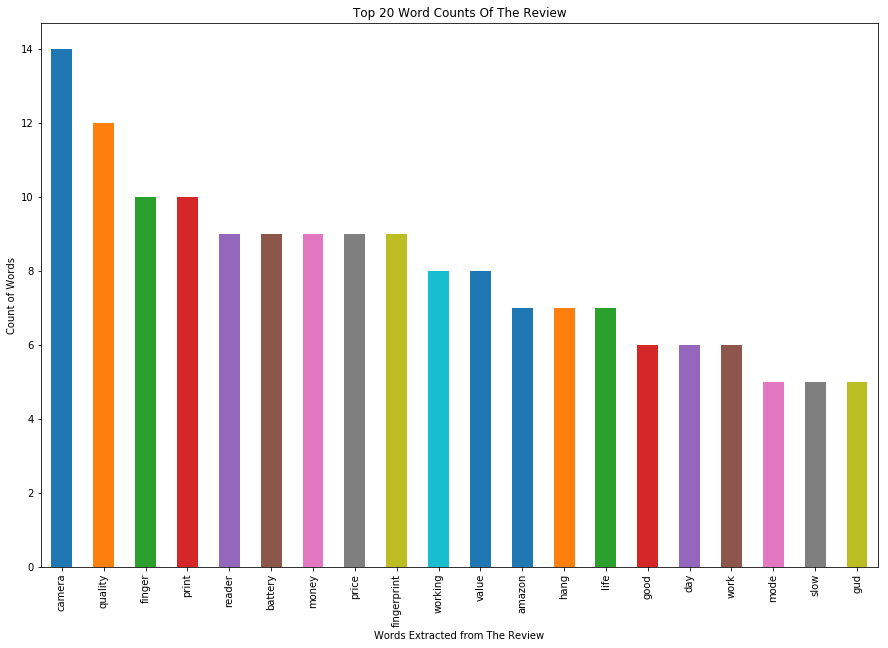

In [53]:
plt.figure(figsize=(15,10))
cnt.value_counts().head(20).plot.bar()
plt.xlabel("Words Extracted from The Review")
plt.ylabel("Count of Words")
plt.title('Top 20 Word Counts Of The Review')
plt.show()

In [54]:
c = ' '.join(c)

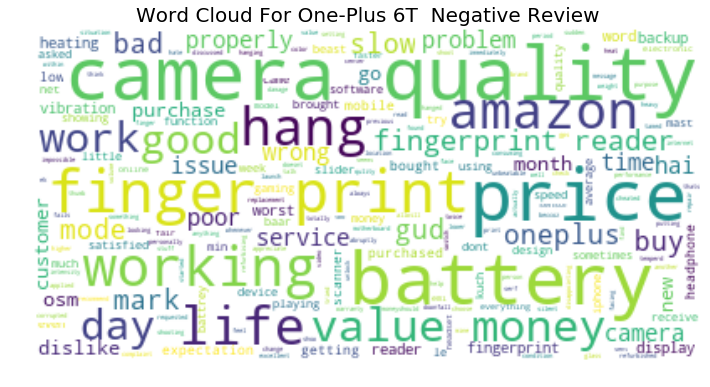

In [55]:
wordcloud = WordCloud(background_color='white').generate(c)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud For One-Plus 6T  Negative Review',{'fontsize':20},loc ='center')
plt.show()

# Inference / Actionable Insights 
    From the above word cloud it is evident that the mobile has certain negative commands
    It includes battery,fingerprint,value for money etc....
    This can be an actionable insight for the company to make it work better.